___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [2]:
!python --version

Python 3.9.13


In [1]:
!pip install tensorflow

     ------------------------------------ 455.9/455.9 MB 680.8 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.9 MB/s eta 0:00:00
     ------------------------------------ 438.7/438.7 kB 885.2 kB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 15

In [3]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [5]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [6]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


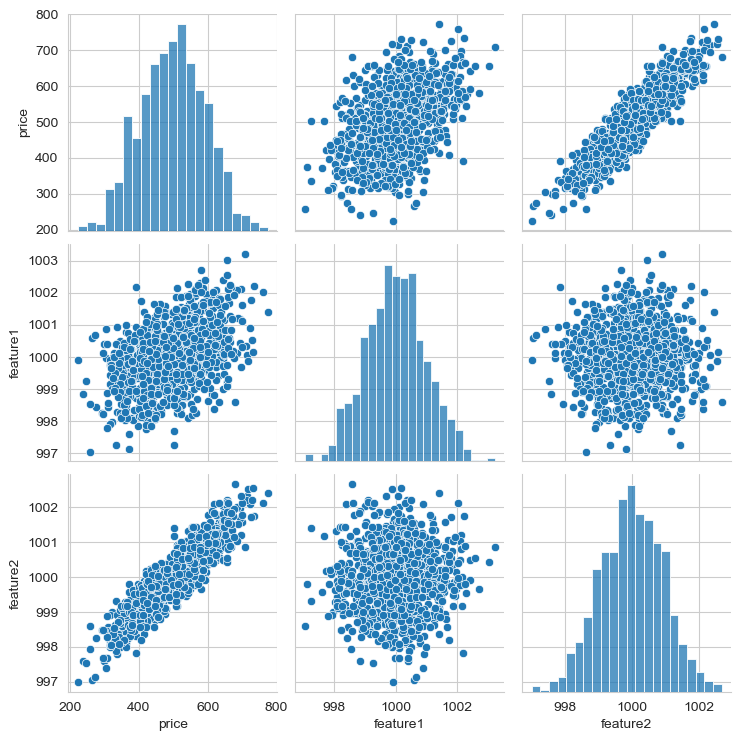

In [9]:
sns.pairplot(df);

In [10]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [11]:
from sklearn.model_selection import train_test_split

In [82]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values

# We will use scaling later so we dont need array now, also scaling convert to array

In [12]:
X = df[['feature1', 'feature2']] 
y = df['price']

In [13]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [14]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [16]:
X_train.shape

(700, 2)

In [17]:
X_test.shape

(300, 2)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [90]:
# help(Sequential)

In [91]:
# help(Dense)

In [24]:
X_train.shape

(700, 2)

In [25]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [26]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.41446614, -0.97569704, -0.6944213 , -0.11420798],
        [ 0.6176572 ,  0.9583409 ,  0.4727404 ,  0.37517285]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.18493545,  0.62749153,  0.50677866, -0.7397867 ],
        [-0.6055788 , -0.3457309 ,  0.29751664, -0.3252117 ],
        [ 0.22182328, -0.14161402, -0.74391127, -0.60780704],
        [-0.16533756, -0.01254946,  0.31219703,  0.46136767]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.14596242,  0.53093046,  0.74177295,  0.4172278 ],
        [ 0.30272907, -0.5535372 ,  0.06755662,  0.1495561 ],
        [ 0.74285036, -0.4835656 , -0.7027

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [36]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [37]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 256732.6094
Epoch 2/250
22/22 [==============================] - 0s 4ms/step - loss: 256672.1875
Epoch 3/250
22/22 [==============================] - 0s 5ms/step - loss: 256620.9375
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 256568.3438
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256509.1875
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256437.7812
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256354.7656
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256260.7344
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 256154.8281
Epoch 10/250
22/22 [==============================] - 0s 4ms/step - loss: 256034.1875
Epoch 11/250
22/22 [==============================] - 0s 4ms/step - loss: 255897.9688
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 3ms/step - loss: 1216.7848
Epoch 97/250
22/22 [==============================] - 0s 2ms/step - loss: 1186.9030
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 1160.4812
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 1133.2007
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 1105.3234
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 1080.2565
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 1056.4141
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 1033.2216
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 1009.7290
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 988.3596
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 965.2557
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 944.2167


22/22 [==============================] - 0s 2ms/step - loss: 24.7345
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 24.9515
Epoch 196/250
22/22 [==============================] - 0s 3ms/step - loss: 24.7235
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7777
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4599
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 24.5648
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 24.6945
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2449
Epoch 202/250
22/22 [==============================] - 0s 3ms/step - loss: 24.5755
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1172
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5213
Epoch 205/250
22/22 [==============================] - 0s 3ms/step - loss: 24.7265
Epoch 206/250
22/2

In [40]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 2.434348  ,  0.8611571 , -0.81369036,  1.8604083 ],
        [ 3.6329134 ,  3.7826147 ,  0.3137541 ,  3.343686  ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.8017377 ,  0.6122382 , -0.16214584,  0.75662875], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.18493545,  2.787952  ,  2.5249345 , -0.7397867 ],
        [-0.6055788 ,  1.9276955 ,  2.449967  , -0.3252117 ],
        [ 0.22182328,  0.13456793, -0.6159922 , -0.60780704],
        [-0.16533756,  2.1250832 ,  2.3266022 ,  0.46136767]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.        , 0.85727507, 0.7153846 , 0.        ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.14596242,  0.53093046,  0.74177295,  0.4172278 ],
        [ 1.9929488 , -0.5535372 ,  

In [41]:
model.history.history

{'loss': [256732.609375,
  256672.1875,
  256620.9375,
  256568.34375,
  256509.1875,
  256437.78125,
  256354.765625,
  256260.734375,
  256154.828125,
  256034.1875,
  255897.96875,
  255737.78125,
  255550.65625,
  255335.59375,
  255088.6875,
  254807.21875,
  254488.984375,
  254127.015625,
  253721.296875,
  253265.984375,
  252760.734375,
  252198.78125,
  251580.234375,
  250899.203125,
  250146.328125,
  249321.625,
  248422.21875,
  247438.578125,
  246380.34375,
  245229.03125,
  243981.046875,
  242636.546875,
  241197.1875,
  239643.46875,
  237980.796875,
  236204.015625,
  234297.1875,
  232283.40625,
  230135.21875,
  227856.09375,
  225436.953125,
  222874.859375,
  220174.3125,
  217340.140625,
  214341.921875,
  211188.890625,
  207881.296875,
  204429.421875,
  200787.125,
  196988.875,
  193036.703125,
  188934.71875,
  184670.359375,
  180225.40625,
  175624.234375,
  170882.046875,
  165965.703125,
  160880.890625,
  155629.640625,
  150277.671875,
  144793.04687

In [42]:
pd.DataFrame(model.history.history)

,loss
0,256732.609
1,256672.188
2,256620.938
3,256568.344
4,256509.188
...,...
245,24.257
246,24.286
247,24.153
248,23.974


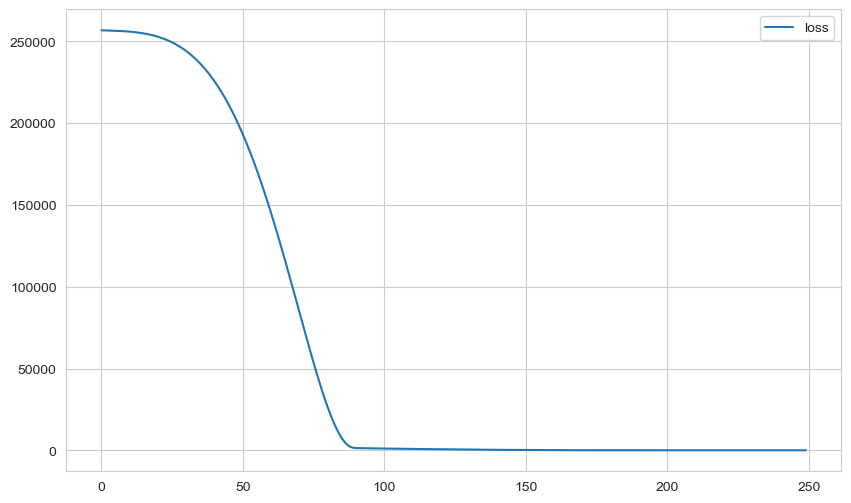

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

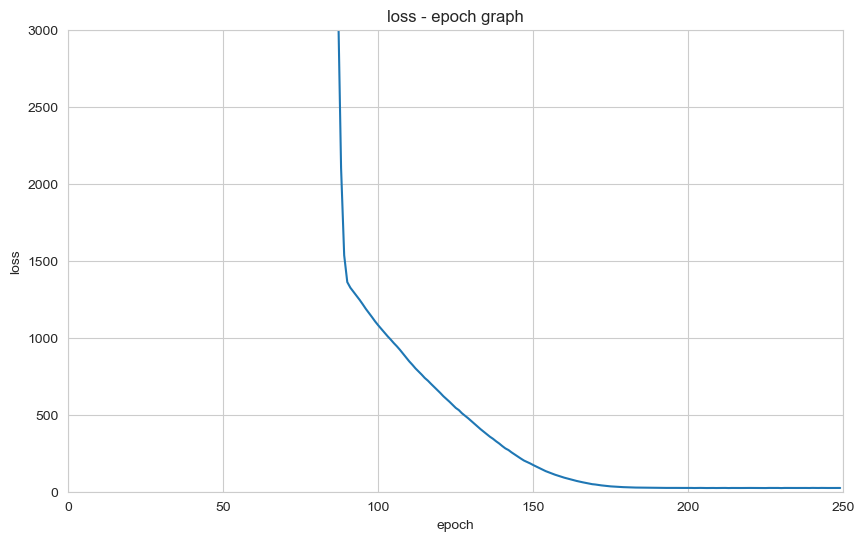

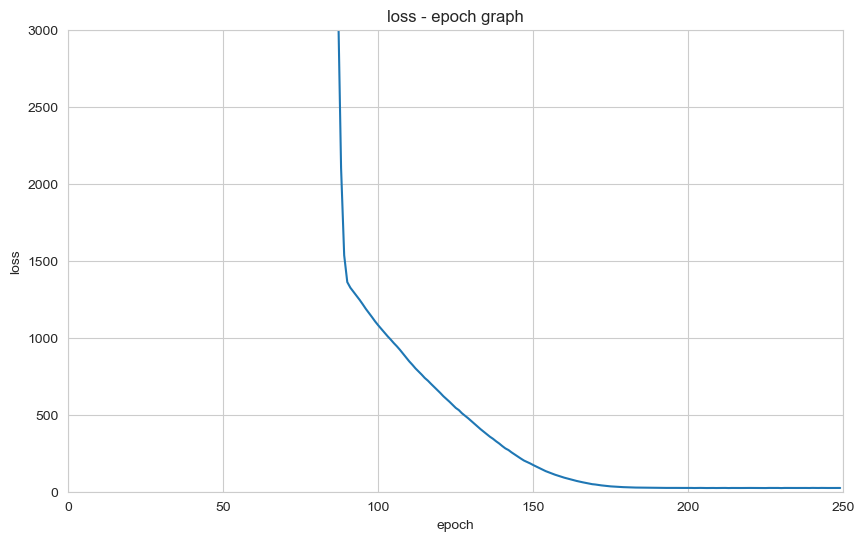

In [48]:
fig, ax = plt.subplots()

ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250])  # focusing on the given x values
ax.set_ylim([0, 3000])  # focusing on the given y values
plt.show()

## Model Performance

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [50]:
model.evaluate(X_train, y_train, verbose=0)

25.092832565307617

In [51]:
model.evaluate(X_test, y_test, verbose=0)

25.45988655090332

In [52]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 2ms/step


(300, 1)

In [53]:
y_test.shape

(300,)

In [54]:
y_pred.reshape(-1,).shape

(300,)

In [55]:
my_dict = {"Actual": y_test, "Pred": y_pred.reshape(-1, )}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
265,487.738,492.639
892,558.877,559.673
5,542.984,542.166
950,478.048,481.585
922,425.483,433.219
599,475.947,479.641
826,511.893,517.802
708,470.964,472.646
761,674.311,661.605
289,530.135,530.261


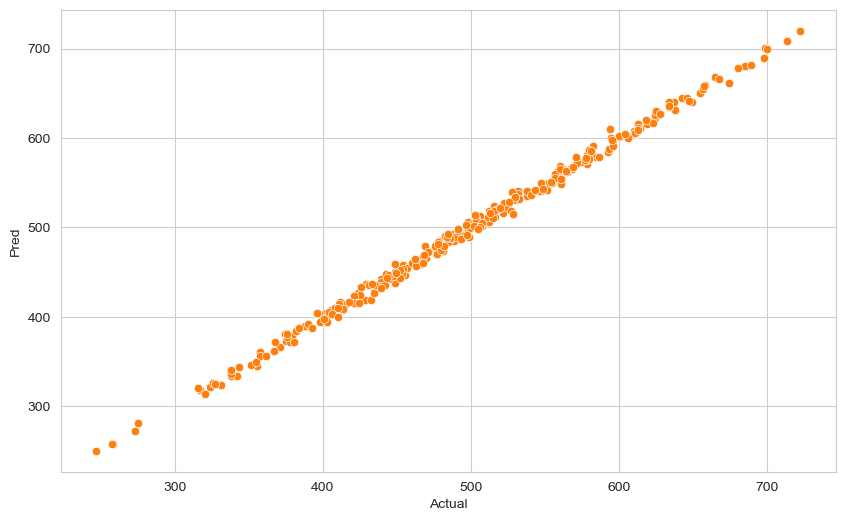

In [57]:
sns.scatterplot(x='Actual', y='Pred', data=compare)
plt.show()

In [58]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:",
                 rmse)

In [59]:
eval_metric(y_test, y_pred)

r2_score: 0.9971042085502739 
mae: 4.041892433761182 
mse: 25.459890122422465 
rmse: 5.0457794365610615


## Final Model and Model Deployment

### Final Model Training

In [60]:
scaler = MinMaxScaler().fit(X)

In [61]:
import pickle

pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [62]:
X_scaled = scaler.transform(X)

In [63]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 257337.8125
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 257147.8438
Epoch 3/250
32/32 [==============================] - 0s 7ms/step - loss: 256941.6094
Epoch 4/250
32/32 [==============================] - 0s 7ms/step - loss: 256710.8594
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 256457.6875
Epoch 6/250
32/32 [==============================] - 0s 8ms/step - loss: 256177.6875
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 255869.1094
Epoch 8/250
32/32 [==============================] - 0s 7ms/step - loss: 255525.2812
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 255144.5625
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 254724.1562
Epoch 11/250
32/32 [==============================] - 0s 5ms/step - loss: 254260.6406
Epoch 12/250
32/32 [==============================] - 0s 7ms/st

32/32 [==============================] - 0s 4ms/step - loss: 1567.5309
Epoch 98/250
32/32 [==============================] - 0s 1ms/step - loss: 1535.3610
Epoch 99/250
32/32 [==============================] - 0s 2ms/step - loss: 1502.2892
Epoch 100/250
32/32 [==============================] - 0s 1ms/step - loss: 1464.8717
Epoch 101/250
32/32 [==============================] - 0s 3ms/step - loss: 1428.4807
Epoch 102/250
32/32 [==============================] - 0s 3ms/step - loss: 1390.8561
Epoch 103/250
32/32 [==============================] - 0s 2ms/step - loss: 1360.6423
Epoch 104/250
32/32 [==============================] - 0s 2ms/step - loss: 1326.8606
Epoch 105/250
32/32 [==============================] - 0s 2ms/step - loss: 1289.1423
Epoch 106/250
32/32 [==============================] - 0s 1ms/step - loss: 1256.1564
Epoch 107/250
32/32 [==============================] - 0s 1ms/step - loss: 1221.0228
Epoch 108/250
32/32 [==============================] - 0s 3ms/step - loss: 1188.6

Epoch 195/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5617
Epoch 196/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6837
Epoch 197/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4470
Epoch 198/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6576
Epoch 199/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4888
Epoch 200/250
32/32 [==============================] - 0s 4ms/step - loss: 24.7229
Epoch 201/250
32/32 [==============================] - 0s 4ms/step - loss: 24.3170
Epoch 202/250
32/32 [==============================] - 0s 3ms/step - loss: 24.6222
Epoch 203/250
32/32 [==============================] - 0s 3ms/step - loss: 24.5246
Epoch 204/250
32/32 [==============================] - 0s 3ms/step - loss: 24.2750
Epoch 205/250
32/32 [==============================] - 0s 4ms/step - loss: 24.8512
Epoch 206/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5191
Epoc

In [64]:
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [65]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [69]:
#final_model.save("model_fake_reg") 

### Loading Model

In [66]:
from tensorflow.keras.models import load_model

In [67]:
model_fake_reg = load_model('model_fake_reg.h5')

In [68]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [69]:
sample = [[998, 1000]]

In [70]:
sample_scaled = scaler_fake_reg.transform(sample)

In [71]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 145ms/step


array([[418.84186]], dtype=float32)

## Prediction-2

In [72]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [73]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [74]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [75]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 52ms/step


array([[378.77118],
       [330.46014],
       [282.14917],
       [233.83818],
       [184.8258 ]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___